In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 59.9 MB/s eta 0:00:00
   ━━━━

устанавливаем через venv

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("juliansimon/weather_madrid_lemd_1997_2015.csv")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/juliansimon/weather_madrid_lemd_1997_2015.csv/versions/1


# Классификация

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')
type(data)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


pandas.core.frame.DataFrame

In [ ]:
import pandas as pd
df = pd.read_csv(path + '/weather_madrid_LEMD_1997_2015.csv')

In [ ]:
df.columns = [col.lower() for col in df.columns]

In [ ]:
df.columns

Index(['cet', 'max temperaturec', 'mean temperaturec', 'min temperaturec',
       'dew pointc', 'meandew pointc', 'min dewpointc', 'max humidity',
       ' mean humidity', ' min humidity', ' max sea level pressurehpa',
       ' mean sea level pressurehpa', ' min sea level pressurehpa',
       ' max visibilitykm', ' mean visibilitykm', ' min visibilitykm',
       ' max wind speedkm/h', ' mean wind speedkm/h', ' max gust speedkm/h',
       'precipitationmm', ' cloudcover', ' events', 'winddirdegrees'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(df[col].unique())

['1997-1-1' '1997-1-2' '1997-1-3' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
[ 7.  5.  2.  8. 12. 13. 16. 17. 15. 11.  6.  9. 10. 14. 18. 19. 20. 22.
 21. 23. 26. 25. 24. 27. 29. 31. 28. 30. 33. 34. 35. 37. 36. 38. 39. 32.
  4. nan  3.  1.  0. 40. 41.]
[ 4.  3.  0. 10.  8.  9.  6.  7. 11. 12. 13. 14. 16. 17. 18. 15. 19. 20.
 21. 22. 23. 24. 28. 27. 26. 29. 32. 25.  2.  5.  1. nan -2. -1. -3. 30.
 31.]
[  2.   0.  -1.   1.  -2.   8.   3.   5.   4.   6.   9.   7.  10.  12.
  11.  15.  14.  13.  19.  17.  16.  18.  22.  28.  20.  21.  23.  -3.
  -4.  -5.  -6.  -9.  27.  nan  -7. -10.  -8.  25.  24.  26.]
[  5.   6.  -2.   2.   1.   7.   8.  10.   9.   4.   3.  12.  11.  13.
  14.  15.  17.  16.  18.  19.  -1.   0.  -4.  -3. -10.  -8.  -5.  20.
  nan  -6.  -9.  -7. -12.]
[  3.   1.  -3.   0.  -1.   4.   5.   7.   6.   2.   9.   8.  10.  11.
  13.  12.  14.  15.  -2.  -4.  -6.  -5. -15. -12.  -7.  -9.  16.  nan
 -11.  -8. -13. -14. -10.]
[  2.   0.  -1.  -4.  -3.   1.   5.   3.   4.   6. 

In [ ]:
df.isna().sum()

,0
cet,0
max temperaturec,2
mean temperaturec,3
min temperaturec,2
dew pointc,2
meandew pointc,2
min dewpointc,2
max humidity,2
mean humidity,2
min humidity,2


In [ ]:
df = df.dropna()

In [ ]:
df[' events'].unique()

array(['Rain', 'Fog', 'Rain-Thunderstorm', 'Thunderstorm', 'Rain-Snow',
       'Fog-Rain', 'Rain-Hail-Thunderstorm', 'Fog-Rain-Thunderstorm',
       'Snow', 'Fog-Rain-Snow', 'Fog-Snow', 'Rain-Snow-Thunderstorm'],
      dtype=object)

In [ ]:
import pandas as pd

df_new = pd.read_csv('/content/Bank_Customer_Churn_Prediction.csv')

In [ ]:
df_new.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
setup?

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df_new, target = 'churn', session_id = 42)

,Description,Value
0,Session id,42
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 14)"
5,Transformed train set shape,"(7000, 14)"
6,Transformed test set shape,"(3000, 14)"
7,Numeric features,9
8,Categorical features,2
9,Preprocess,True


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
exp.setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8606,0.8578,0.4516,0.7692,0.5684,0.4920,0.5172,1.5000
rf,Random Forest Classifier,0.8560,0.8412,0.4320,0.7566,0.5498,0.4717,0.4980,1.5033
lightgbm,Light Gradient Boosting Machine,0.8544,0.8458,0.4706,0.7182,0.5682,0.4853,0.5012,0.5300
et,Extra Trees Classifier,0.8497,0.8381,0.4004,0.7457,0.5198,0.4404,0.4709,0.6367
ada,Ada Boost Classifier,0.8493,0.8330,0.4411,0.7100,0.5436,0.4593,0.4782,0.7333
xgboost,Extreme Gradient Boosting,0.8450,0.8296,0.4643,0.6737,0.5495,0.4598,0.4715,0.4767
lda,Linear Discriminant Analysis,0.8076,0.7567,0.2181,0.5750,0.3159,0.2293,0.2663,0.1067
ridge,Ridge Classifier,0.8050,0.7567,0.1094,0.6247,0.1861,0.1332,0.2007,0.2000
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0933
lr,Logistic Regression,0.7893,0.7352,0.0891,0.3714,0.1415,0.0783,0.1003,2.7433


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0480
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0280
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0260
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2140
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0260
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1700
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.2070
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1700
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0410
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.2490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

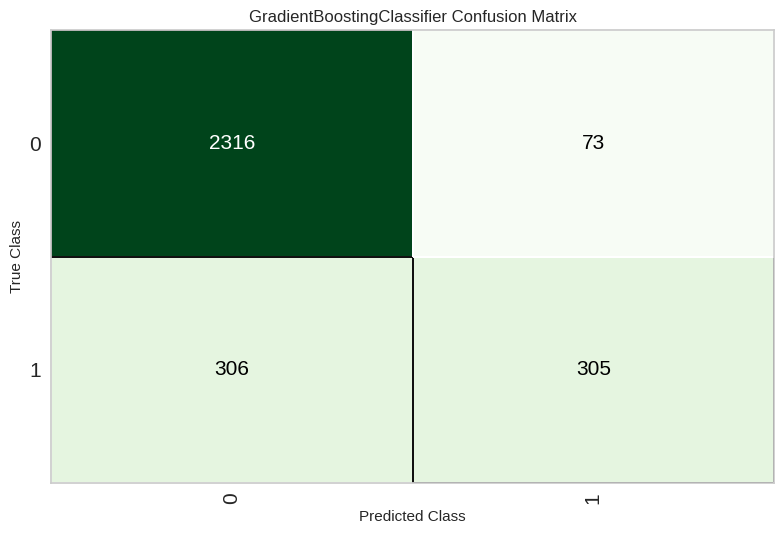

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

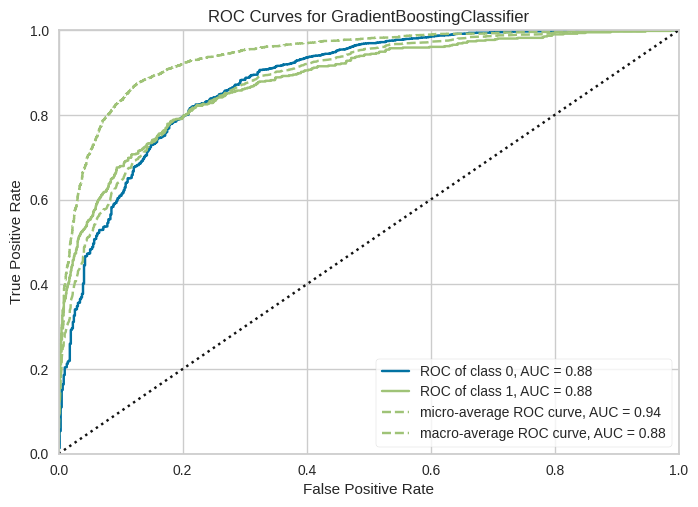

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

In [ ]:
tune_model?

In [ ]:
tuned = tune_model(best) # настройка гиперпараметров

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8343,0.8487,0.3732,0.6625,0.4775,0.3880,0.4106
1,0.8729,0.8517,0.5000,0.7978,0.6147,0.5433,0.5646
2,0.8657,0.8430,0.4507,0.8000,0.5766,0.5041,0.5334
3,0.8629,0.8783,0.4577,0.7738,0.5752,0.4998,0.5243
4,0.8586,0.8504,0.4755,0.7391,0.5787,0.4985,0.5160
5,0.8771,0.8600,0.5385,0.7938,0.6417,0.5708,0.5865
6,0.8486,0.8433,0.4755,0.6869,0.5620,0.4741,0.4858
7,0.8586,0.8750,0.4266,0.7821,0.5520,0.4766,0.5075
8,0.8614,0.8634,0.4476,0.7805,0.5689,0.4935,0.5206


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predictions = predict_model(best, data=df_new)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8733,0.8855,0.4865,0.8177,0.6100,0.5401,0.5661


In [ ]:
type(best)

sklearn.ensemble._gb.GradientBoostingClassifier

In [ ]:
# save pipeline
save_model(best, 'pycaret_classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitude'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_im...
                                             criterion='

In [ ]:
save_experiment?

In [ ]:
save_experiment("my_classification_experiment")

In [ ]:
type(exp)

pycaret.regression.oop.RegressionExperiment

# Регрессия

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
import pandas as pd

X_reg = pd.DataFrame(housing.data, columns=housing.feature_names)
y_reg = pd.DataFrame(housing.target, columns=housing.target_names)

df_reg = X_reg
df_reg[housing.target_names[0]] = housing.target

In [ ]:
df_reg.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
from pycaret.regression import *
s = setup(df_reg, target = 'MedHouseVal', session_id = 36)

,Description,Value
0,Session id,36
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
exp.setup(df_reg, target = 'MedHouseVal', session_id = 36)

,Description,Value
0,Session id,36
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3115,0.2181,0.4667,0.8385,0.1413,0.1758,0.8490
xgboost,Extreme Gradient Boosting,0.3130,0.2246,0.4737,0.8336,0.1435,0.1757,0.3660
et,Extra Trees Regressor,0.3333,0.2567,0.5064,0.8098,0.1490,0.1846,3.8560
rf,Random Forest Regressor,0.3369,0.2631,0.5128,0.8051,0.1528,0.1906,10.4580
gbr,Gradient Boosting Regressor,0.3689,0.2856,0.5342,0.7884,0.1627,0.2108,3.5900
ridge,Ridge Regression,0.5288,0.5268,0.7255,0.6097,0.2231,0.3159,0.0390
br,Bayesian Ridge,0.5288,0.5268,0.7254,0.6097,0.2231,0.3159,0.0410
lr,Linear Regression,0.5288,0.5269,0.7255,0.6096,0.2231,0.3158,0.9230
dt,Decision Tree Regressor,0.4712,0.5405,0.7349,0.5994,0.2149,0.2569,0.2910
lar,Least Angle Regression,0.5450,0.6314,0.7912,0.5321,0.2321,0.3130,0.0370


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=36, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
best = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3158,0.2264,0.4758,0.8317,0.1432,0.1777
1,0.3147,0.2373,0.4872,0.8268,0.1446,0.1687
2,0.3022,0.1882,0.4338,0.8571,0.1368,0.1777
3,0.3172,0.2267,0.4761,0.8295,0.1486,0.1923
4,0.3201,0.2285,0.4780,0.8340,0.1433,0.1802
5,0.3121,0.2085,0.4566,0.8529,0.1376,0.1740
6,0.3173,0.2198,0.4688,0.8317,0.1403,0.1746
7,0.3135,0.2333,0.4830,0.8316,0.1446,0.1680
8,0.3049,0.2046,0.4523,0.8456,0.1418,0.1846


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

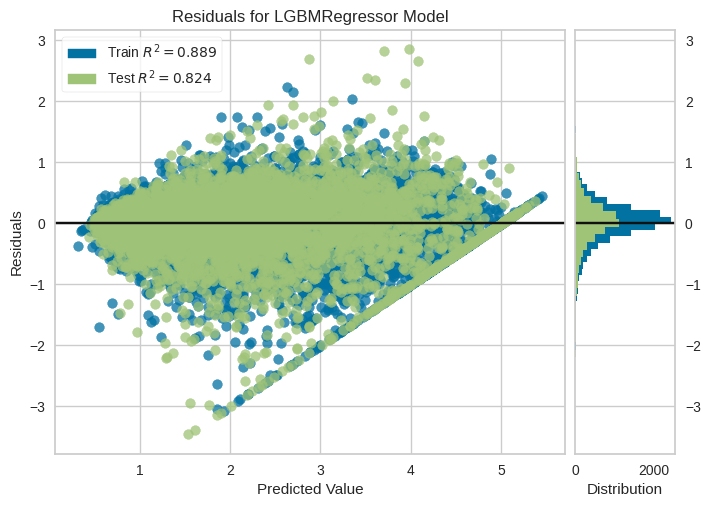

In [ ]:
plot_model(best, plot = 'residuals')

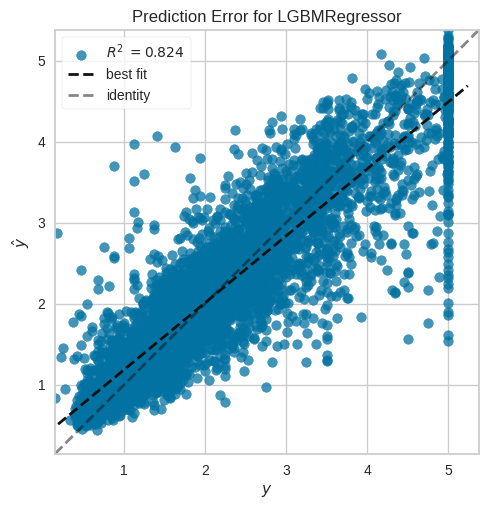

In [ ]:
plot_model(best, plot = 'error')

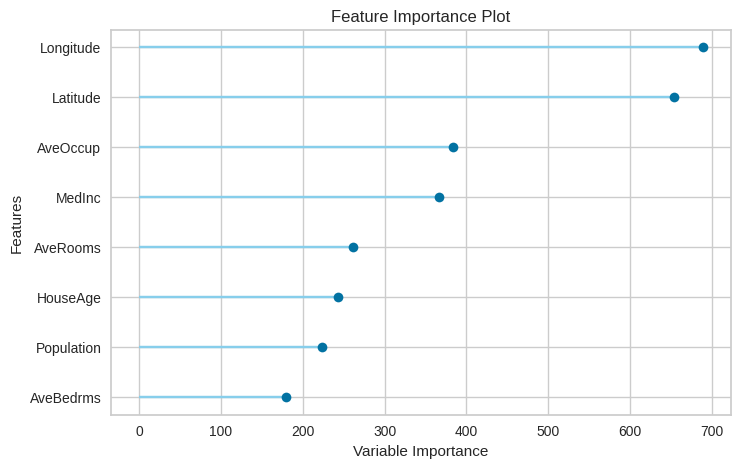

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Пример на внутренней модели

In [1]:
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
from pycaret.datasets import get_data
data = get_data('airline')

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<Axes: xlabel='Period'>

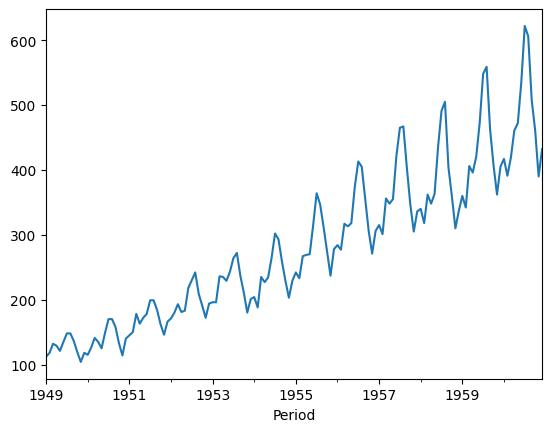

In [3]:
data.plot()

In [4]:
from pycaret.time_series import *

# fh = 3 - 3 периода вперед
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [5]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [6]:
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [7]:
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [8]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [9]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.0667
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.4433
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,4.8800
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.1500
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,28.3133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.1800
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.6600
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.3233
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2867
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.2633


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

# Графики и результаты с сохранением

In [10]:
plot_model(best, plot = 'forecast')

In [11]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [12]:
plot_model(best, plot = 'residuals')

In [14]:
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,STLF,0.3305,0.3157,10.5518,11.4475,0.0255,0.0252,0.8457


In [15]:
holdout_pred.head()

,y_pred
1960-10,455.2909
1960-11,406.4324
1960-12,441.5140


In [16]:
predict_model(best, fh = 36)

,y_pred
1960-10,455.2909
1960-11,406.4324
1960-12,441.5140
1961-01,456.2386
1961-02,430.1439
1961-03,471.7323
1961-04,490.5395
1961-05,507.2320
1961-06,567.3178
1961-07,650.9920


In [17]:
save_model(best, 'timeseries_best_pycaret')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 STLForecaster(sp=12))]))]),
 'timeseries_best_pycaret.pkl')

In [18]:
loaded_best_pipeline = load_model("timeseries_best_pycaret")
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                STLForecaster(sp=12))]))])